In [1]:
import torch.nn as nn

from datasets import *
from evaluation import *
from models import *
from pruning.unstructured import *
from pruning.structured import *

c:\Users\prabh\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\Users\prabh\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Importing C:\Users\prabh\Smart-pruner-dev\pruning\unstructured\L1norm.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\Train.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\unstructured\random.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\decay_pruning.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\two_to_four.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Thinet.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Global_pruning.py
Importing C:\Users\prabh\Smart-pruner-dev\pruning\structured\Ln_structured.py


In [2]:
dataset = MNIST()
train_loader, test_loader = dataset.get_dataloader()

In [3]:
#train model and return it
model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = Trainer(model, 20, train_loader, criterion, optimizer)
original_model = model.train()
print("Accuracy of original model : ", accuracy(original_model, test_loader))

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.9771 | 
Epoch: 2 | train_loss: 3.6005 | 
Epoch: 3 | train_loss: 3.2521 | 
Epoch: 4 | train_loss: 3.0078 | 
Epoch: 5 | train_loss: 2.7930 | 
Epoch: 6 | train_loss: 2.5581 | 
Epoch: 7 | train_loss: 2.3734 | 
Epoch: 8 | train_loss: 2.2090 | 
Epoch: 9 | train_loss: 1.9714 | 
Epoch: 10 | train_loss: 1.7803 | 
Epoch: 11 | train_loss: 1.6020 | 
Epoch: 12 | train_loss: 1.4554 | 
Epoch: 13 | train_loss: 1.1330 | 
Epoch: 14 | train_loss: 1.3024 | 
Epoch: 15 | train_loss: 1.0811 | 
Epoch: 16 | train_loss: 0.8476 | 
Epoch: 17 | train_loss: 0.6600 | 
Epoch: 18 | train_loss: 0.9359 | 
Epoch: 19 | train_loss: 0.9643 | 
Epoch: 20 | train_loss: 0.6710 | 
Accuracy of original model :  [98.77]


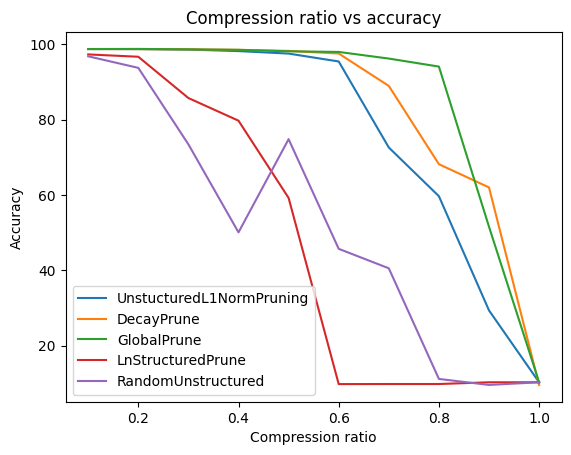

In [4]:
pruning_techniques = {
    "UnstucturedL1NormPruning":UnstructuredL1normPrune(),
    "DecayPrune":DecayPrune(),
    "GlobalPrune":GlobalPrune(),
    "LnStructuredPrune":LnStructuredPrune(),
    "RandomUnstructured":RandomUnstructured()
    }
# print(type(UnstructuredL1normPrune))
compare_compression_ratio_vs_accuracy(original_model, dataset ,pruning_techniques)